In [6]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [117]:
data = pd.read_csv('Resources/data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,64
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,67
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,56
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,37
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,40


In [103]:
spending = data.groupby(['Education']).agg(
            wine = ('MntWines', 'sum'),
             fruit = ('MntFruits','sum'),
             meat = ('MntMeatProducts','sum'),
            fish = ('MntFishProducts','sum'),
            sweets = ('MntSweetProducts','sum'),
            gold = ('MntGoldProds','sum')            
             ).reset_index()
spending.head()

spending["spending"] = spending.sum(axis=1)
spending


,Education,wine,fruit,meat,fish,sweets,gold,spending
0,2n Cycle,40169,5872,27016,9608,6945,9376,98986
1,Basic,391,600,618,921,654,1233,4417
2,Graduation,318111,34441,201319,48453,34915,56563,693802
3,Master,121538,7802,59466,11495,7595,14669,222565
4,PhD,195874,9690,81644,12928,9787,15586,325509


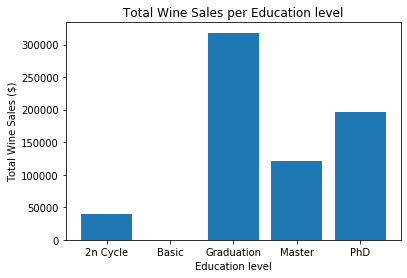

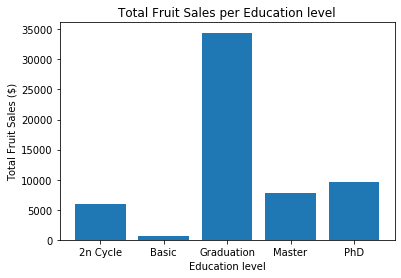

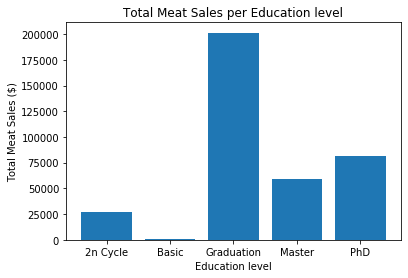

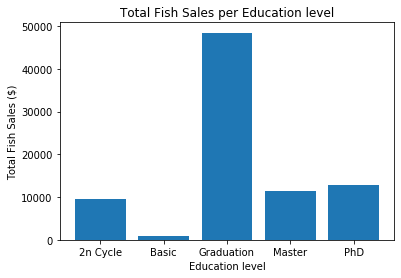

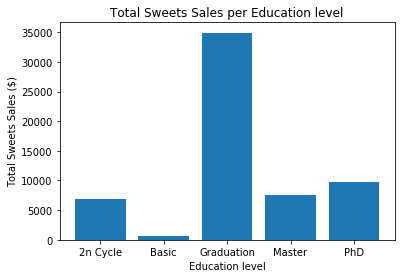

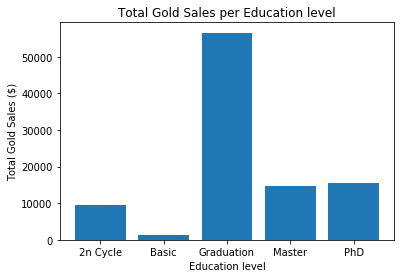

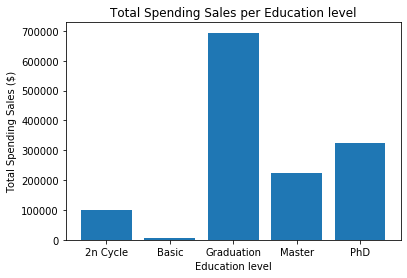

In [104]:
#Loop to create graphs for each of the above relationships
products = ['wine', 'fruit', 'meat', 'fish', 'sweets', 'gold','spending']
for product in products:
    plt.bar(spending["Education"],spending[f'{product}'])
    plt.xlabel('Education level')
    plt.ylabel(f'Total {product.title()} Sales ($)')
    plt.title(f'Total {product.title()} Sales per Education level')
    plt.savefig(f'Images/{product}_sales_education.png')
    plt.show()

In [81]:
# Saving for later if needed
age_count = data["Age"].value_counts()
df = data["Age"].value_counts().rename_axis('Age').reset_index(name='count')
df.sort_values(by = ["Age"])

In [123]:
child_df = data.copy()


In [137]:
kid_home_df = child_df.groupby(['Kidhome']).agg(
            wine = ('MntWines', 'sum'),
             fruit = ('MntFruits','sum'),
             meat = ('MntMeatProducts','sum'),
            fish = ('MntFishProducts','sum'),
            sweets = ('MntSweetProducts','sum'),
            gold = ('MntGoldProds','sum')            
             ).reset_index()
kid_home_df["spending"] = kid_home_df.sum(axis=1)
kid_home_df.head()

,Kidhome,wine,fruit,meat,fish,sweets,gold,spending
0,0,580221,50551,325119,72195,52078,77038,1157202
1,1,92550,7576,43560,10894,7639,19613,181833
2,2,3312,278,1384,316,179,776,6247


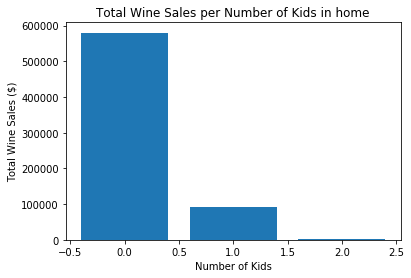

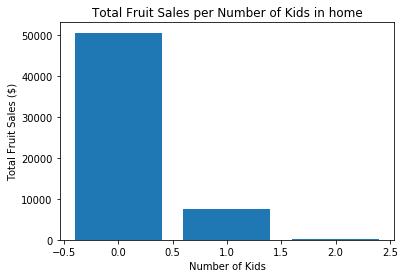

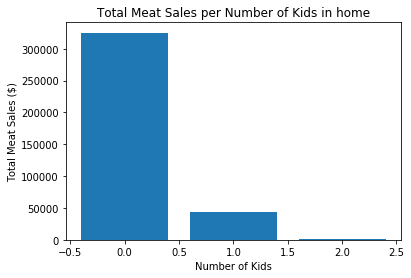

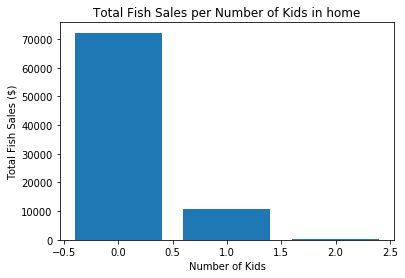

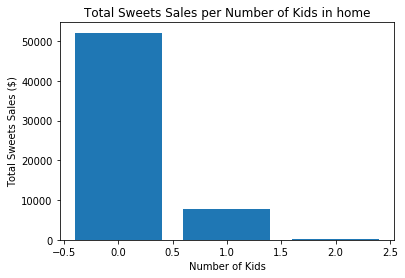

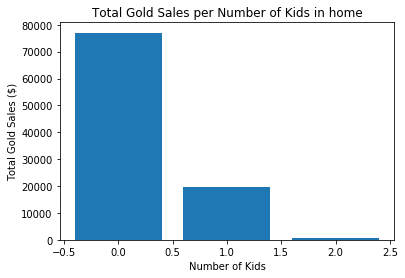

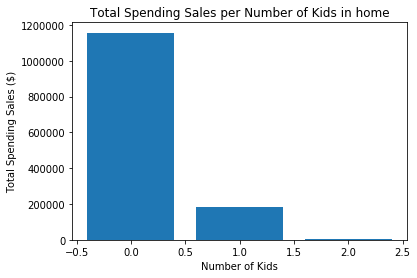

In [138]:
products = ['wine', 'fruit', 'meat', 'fish', 'sweets', 'gold','spending']
for product in products:
    plt.bar(kid_home_df["Kidhome"],kid_home_df[f'{product}'])
    plt.xlabel('Number of Kids')
    plt.ylabel(f'Total {product.title()} Sales ($)')
    plt.title(f'Total {product.title()} Sales per Number of Kids in home')
    plt.savefig(f'Images/{product}_sales_kids_home.png')
    plt.show()

In [132]:
teen_home_df = child_df.groupby(['Teenhome']).agg(
            wine = ('MntWines', 'sum'),
             fruit = ('MntFruits','sum'),
             meat = ('MntMeatProducts','sum'),
            fish = ('MntFishProducts','sum'),
            sweets = ('MntSweetProducts','sum'),
            gold = ('MntGoldProds','sum')            
             ).reset_index()
teen_home_df

,Teenhome,wine,fruit,meat,fish,sweets,gold
0,0,350940,38246,259936,55987,38482,51745
1,1,307060,19268,103811,26227,20628,43365
2,2,18083,891,6316,1191,786,2317
